In [19]:
import matplotlib.pyplot as plt
import json
import nltk
from nltk.corpus import stopwords
import itertools


In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\envy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
with open("./government_schemes.json","r") as f:
    data=json.load(f)

In [6]:
data

[{'Sno': 1,
  'Policy name': 'National AIDS Control Organisation (NACO) Internship Programme',
  'Description': {'details': 'NACO initiated the Internship Programme in 2018 for young students who wish to engage with the Government. The internship programme envisages an opportunity for young students to get familiar with and understand the various dimensions of policy-making & implementation of the National AIDS Control Programme. It will serve as an exposure for the interns regarding the functioning of the Government of India. It will be mutually beneficial for the organization as well as students to have a structured internship programme under the aegis of NACO, Ministry of Health and Family Welfare. The internship programme would provide an excellent opportunity for budding scholars to familiarise themselves with the process of formulation of health policy and its implementation by the Government of India, with specific reference to the National HIV/AIDS and STD Control Programme.\uf

In [7]:
states={}
ministries={}
for scheme in data:
    if(scheme["State"] not in states):
        states[scheme["State"]]=0
    states[scheme["State"]]+=1
    if(scheme["Ministry"] not in ministries):
        ministries[scheme["Ministry"]]=0
    ministries[scheme["Ministry"]]+=1


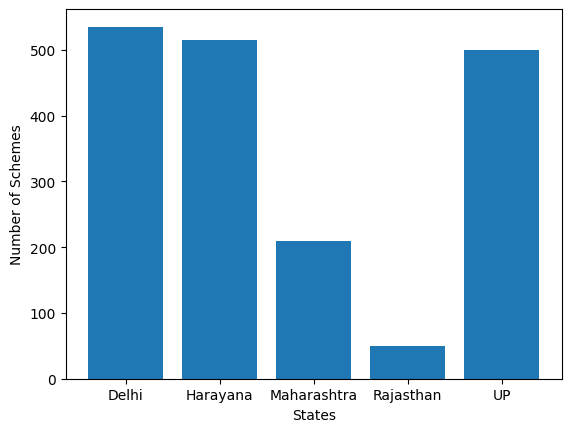

In [10]:
plt.bar(states.keys(),states.values())
plt.xlabel("States")
plt.ylabel("Number of Schemes")
plt.show()

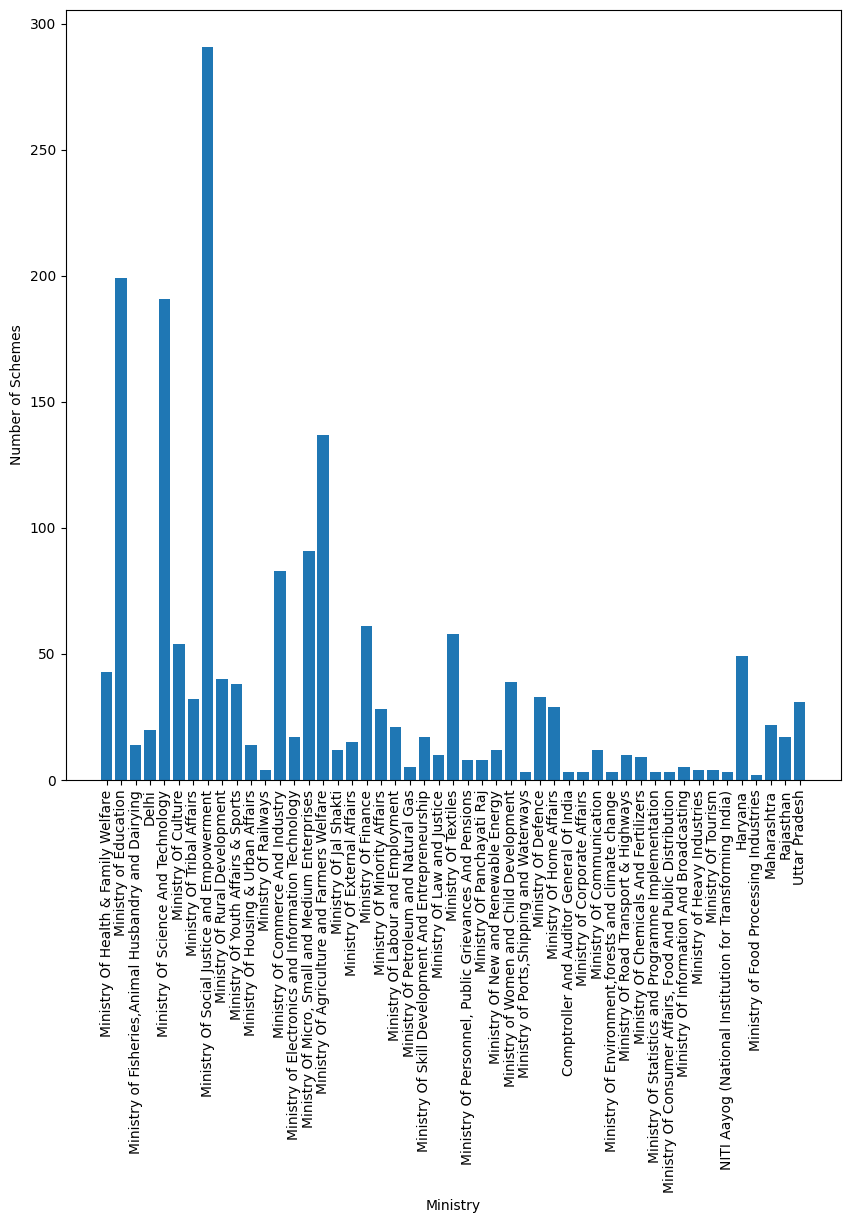

In [13]:
plt.figure(figsize=(10, 10))
plt.bar(ministries.keys(),ministries.values())
plt.xlabel("Ministry")
plt.xticks(rotation=90)
plt.ylabel("Number of Schemes")
plt.show()

In [18]:
stop_words = set(stopwords.words('english'))
policies={}
for scheme in data:
    count=0
    for word in scheme["Policy name"]:
        if word.lower() in stop_words:
            count+=1
    for desc in scheme["Description"]:
        for word in scheme['Description'][desc]:
            if word.lower() in stop_words:
                count+=1
    for word in scheme["Ministry"]:
        if word.lower() in stop_words:
            count+=1
    policies[scheme["Sno"]]=count

    

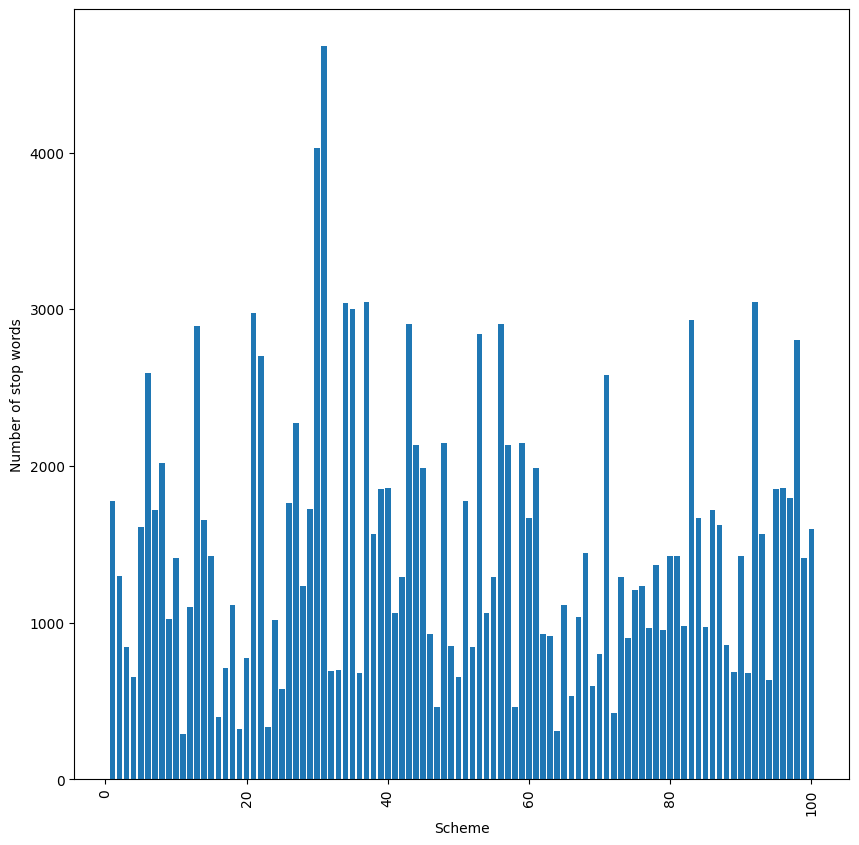

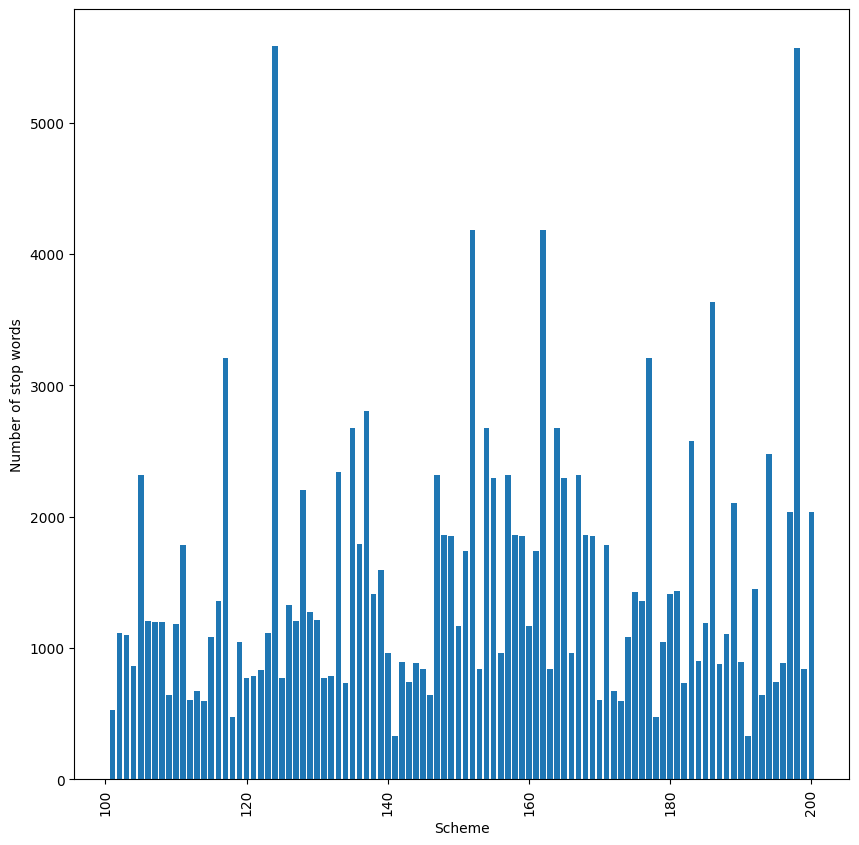

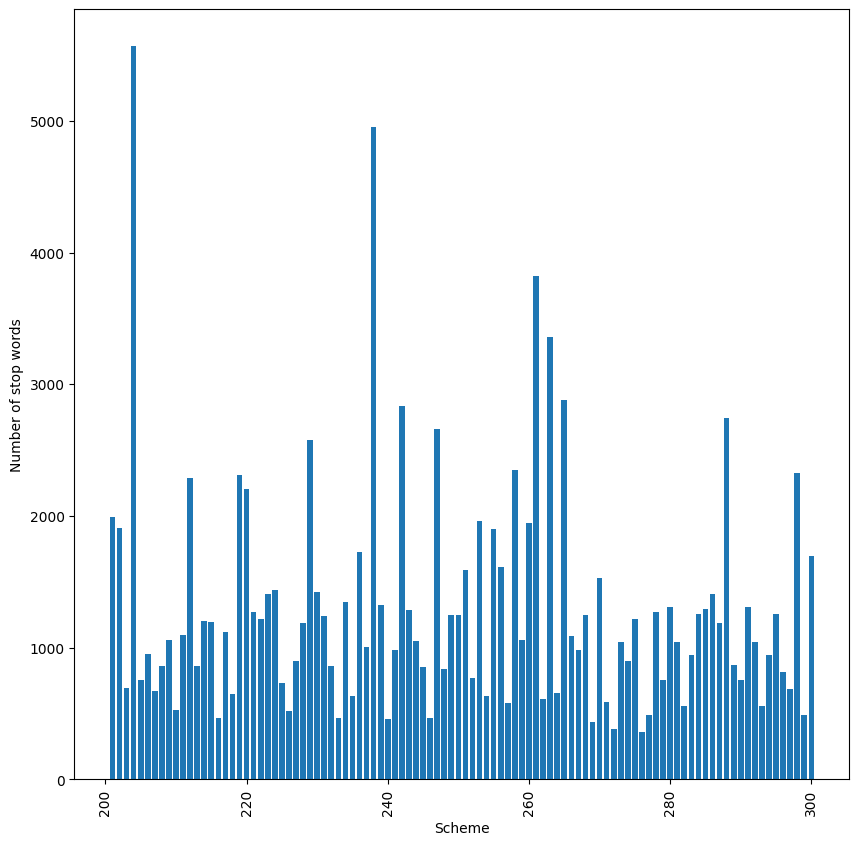

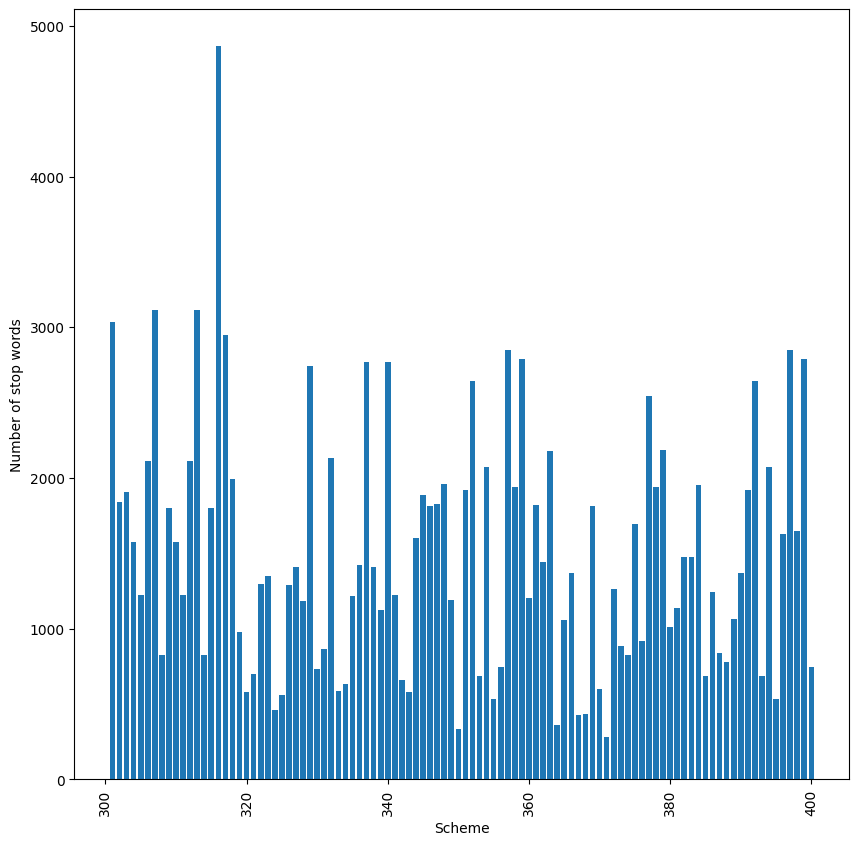

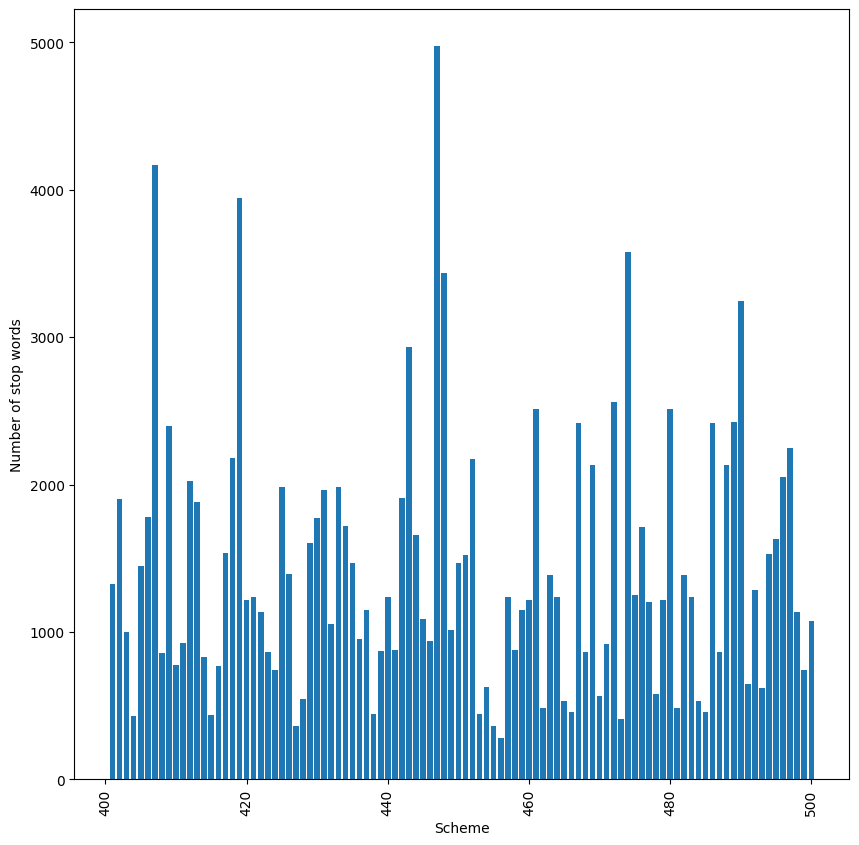

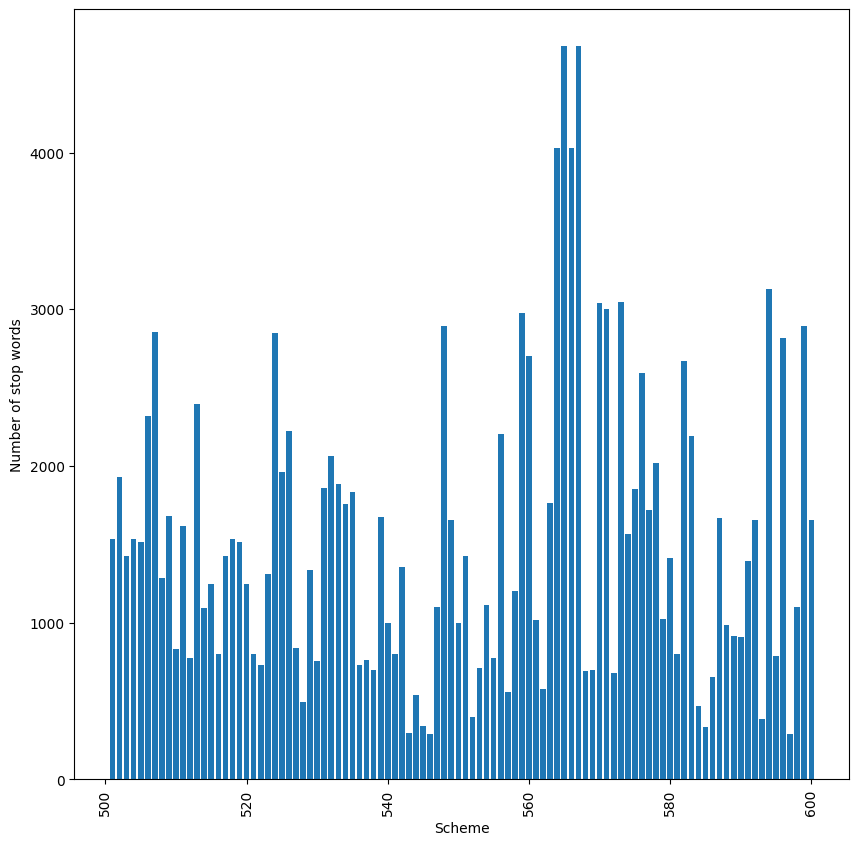

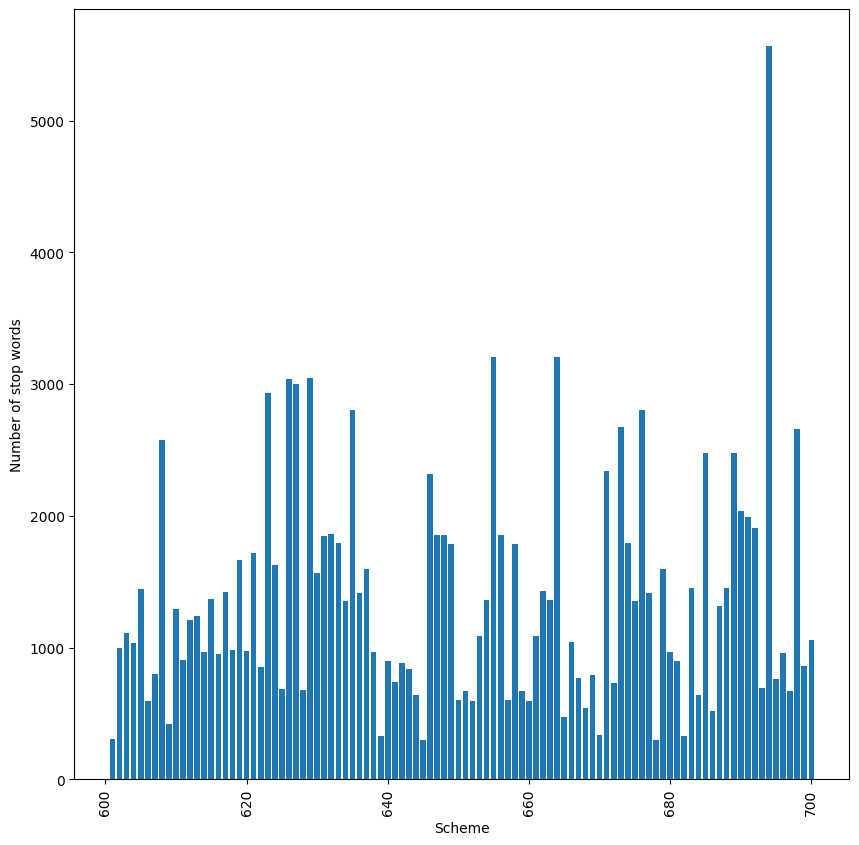

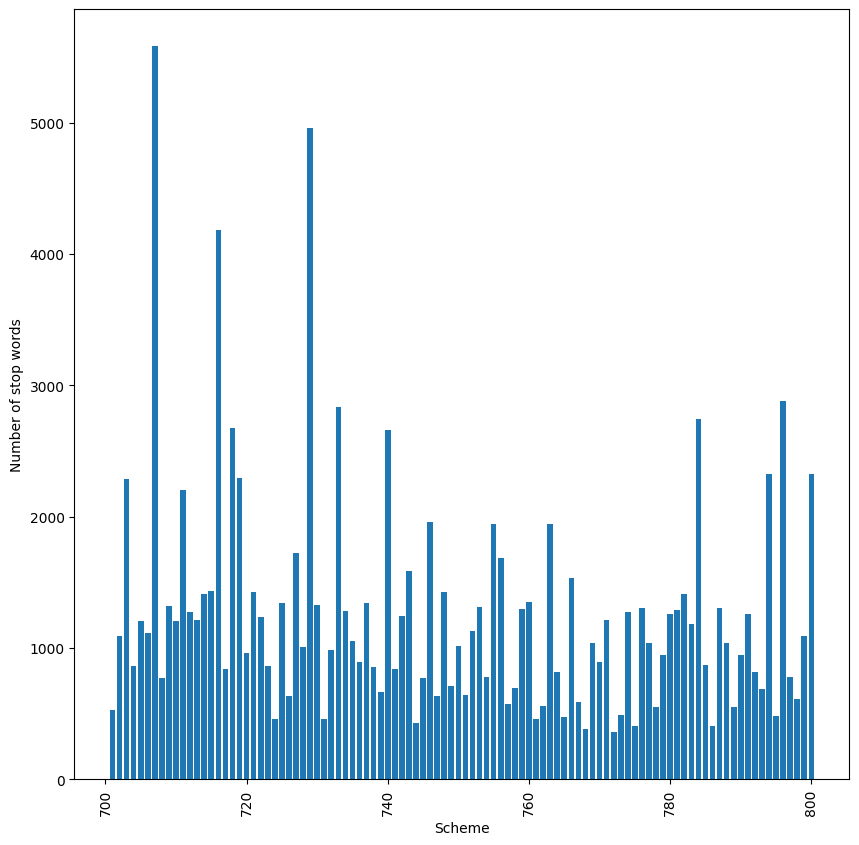

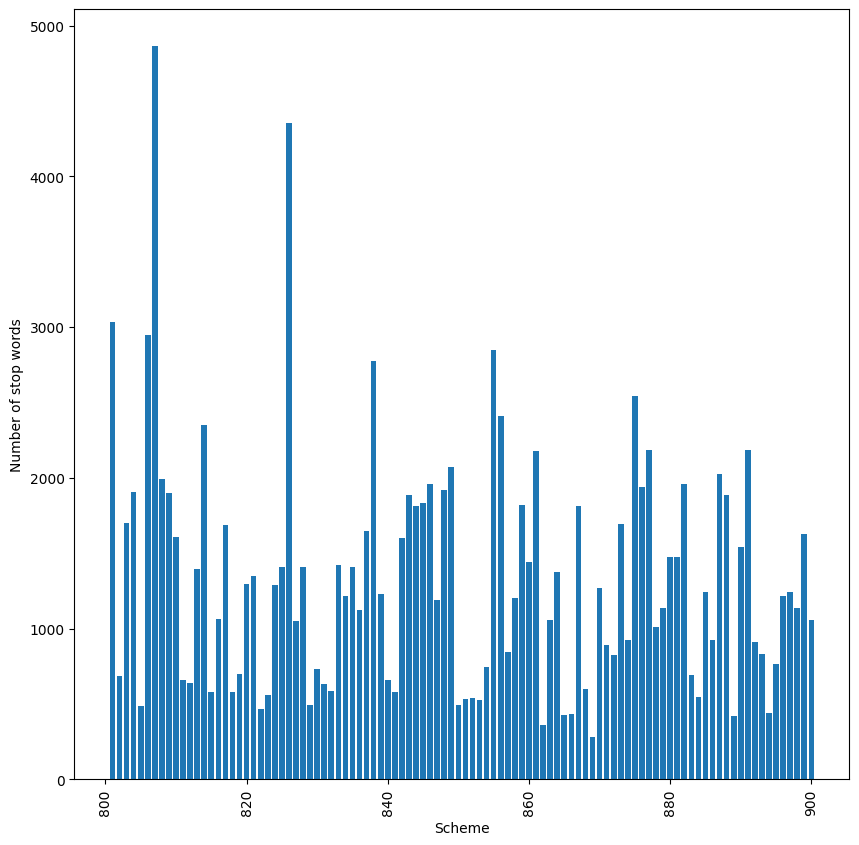

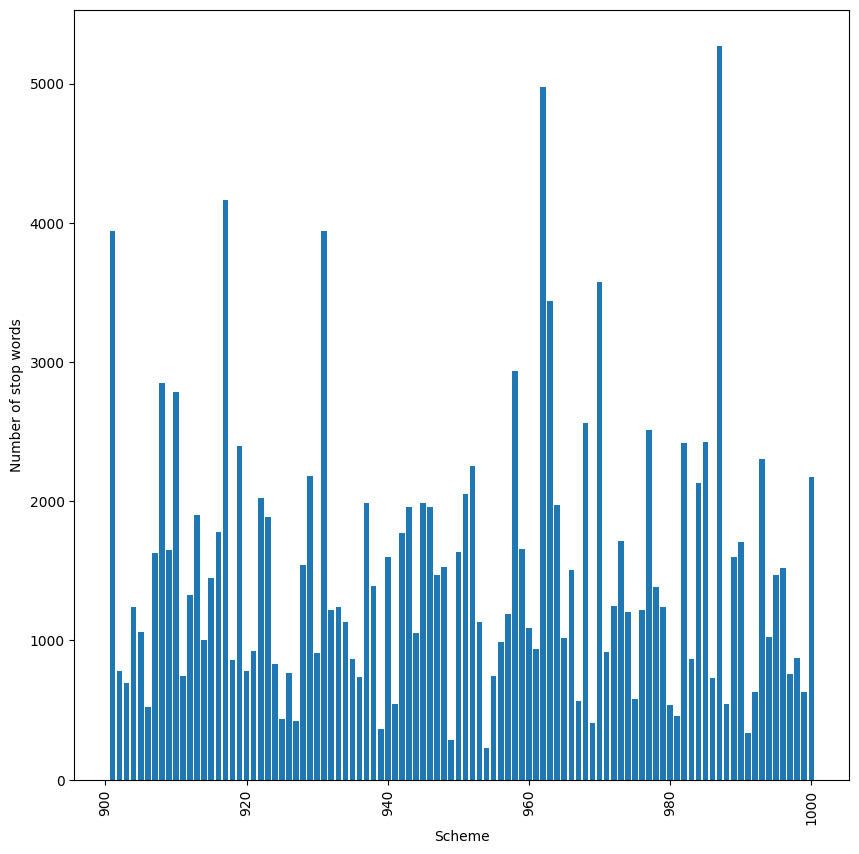

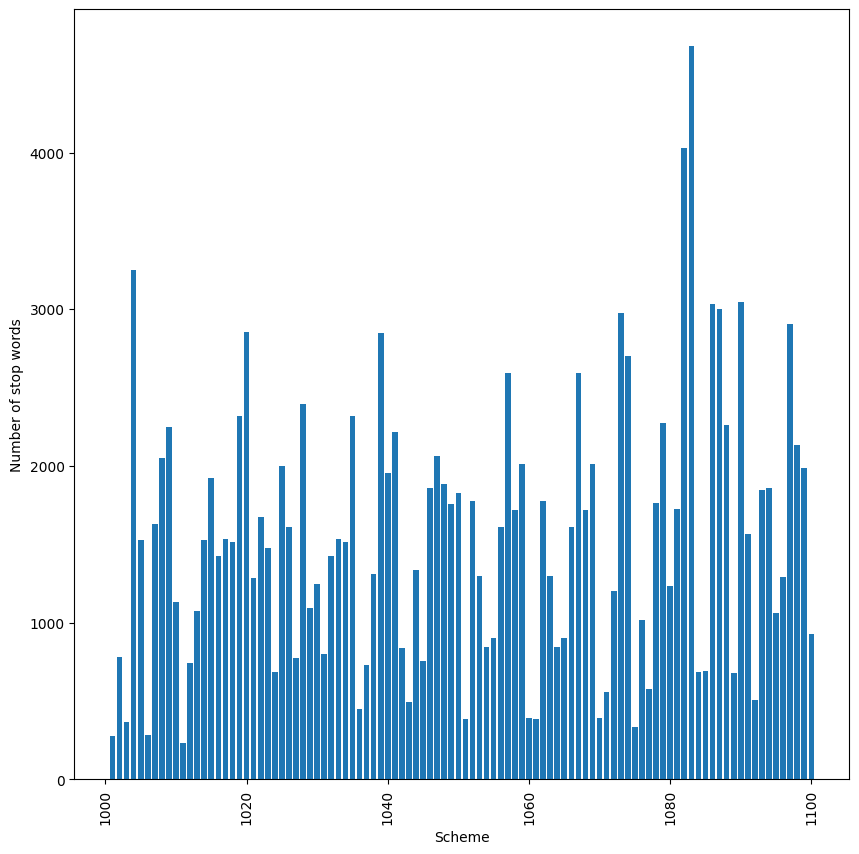

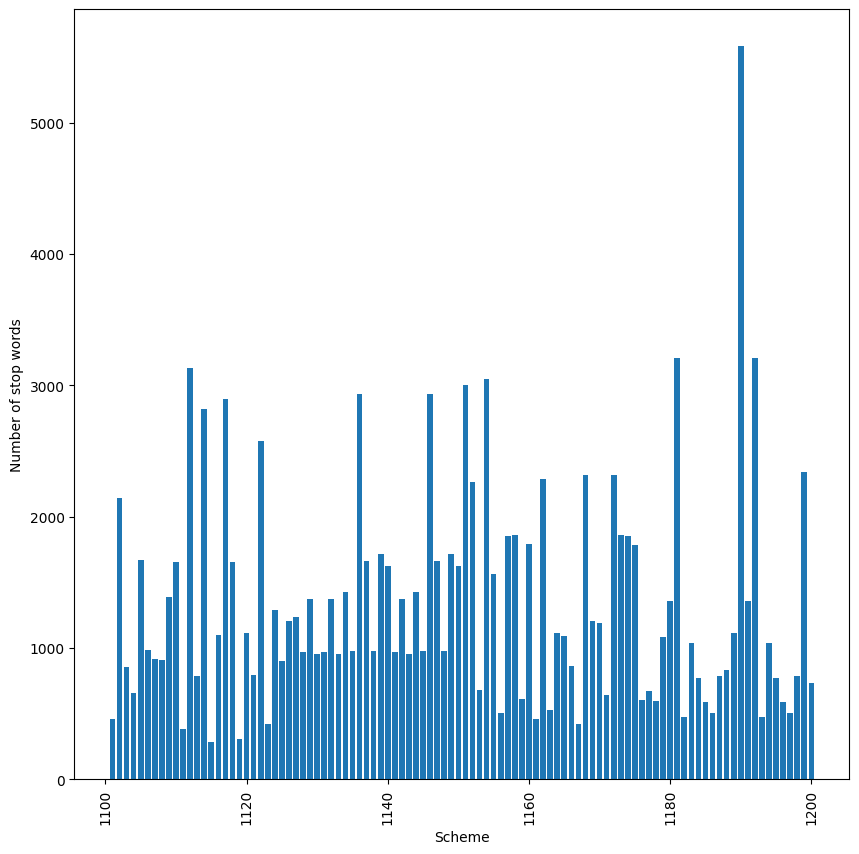

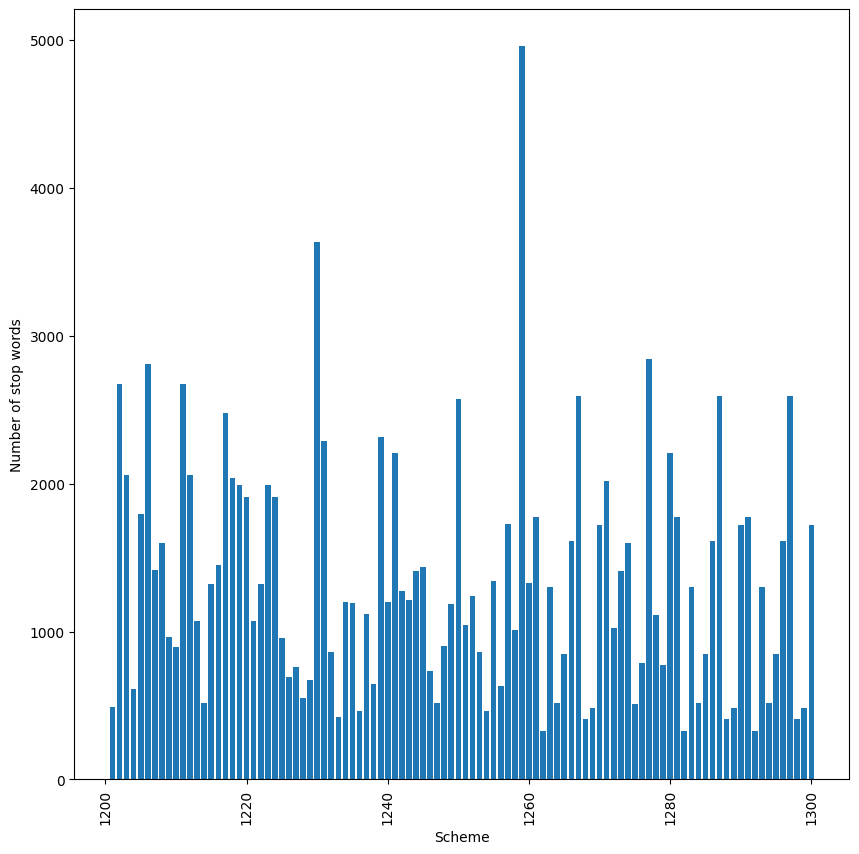

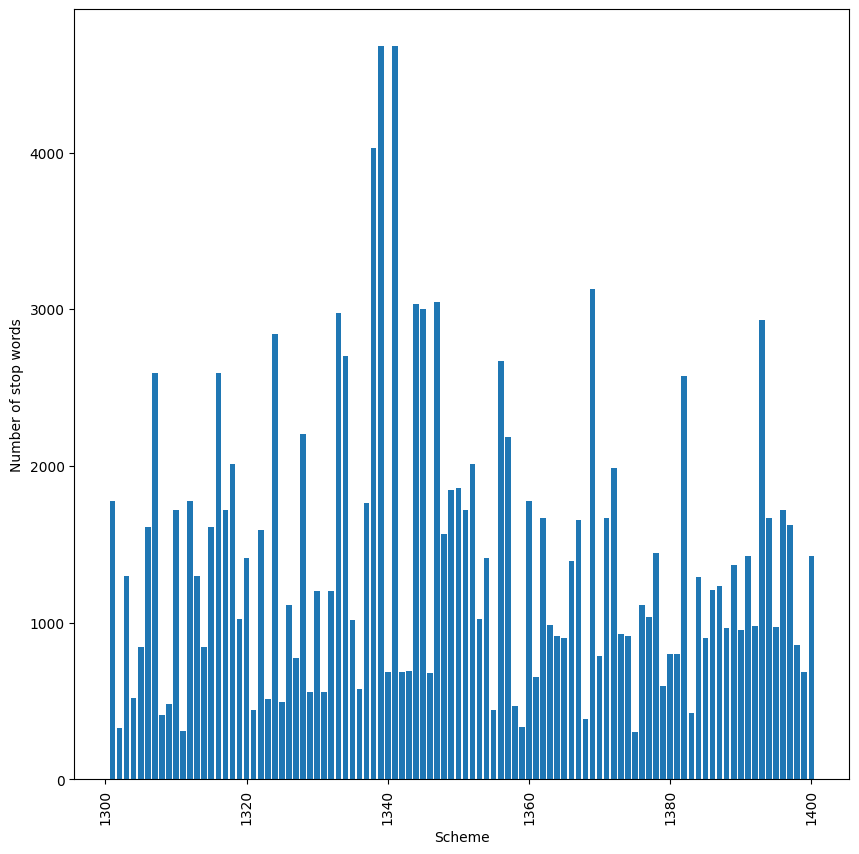

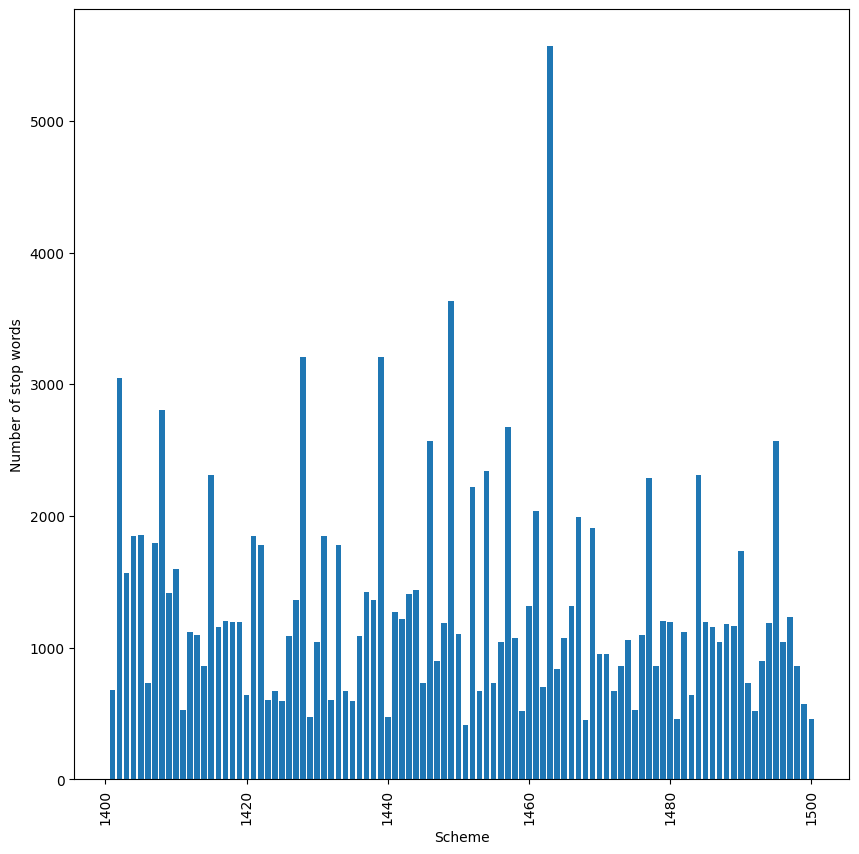

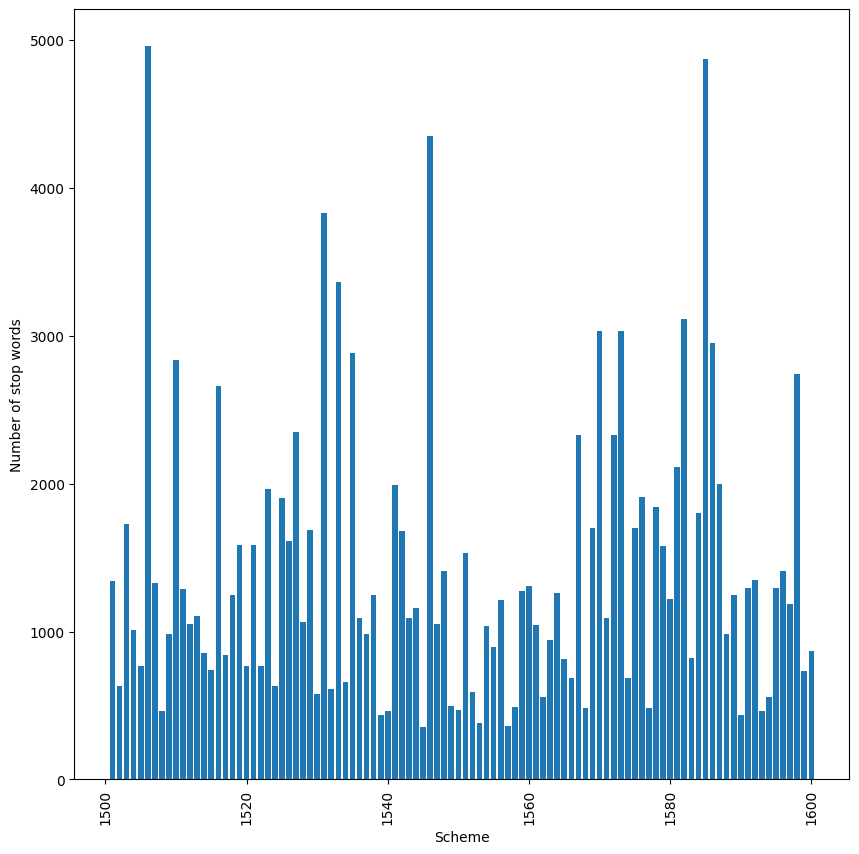

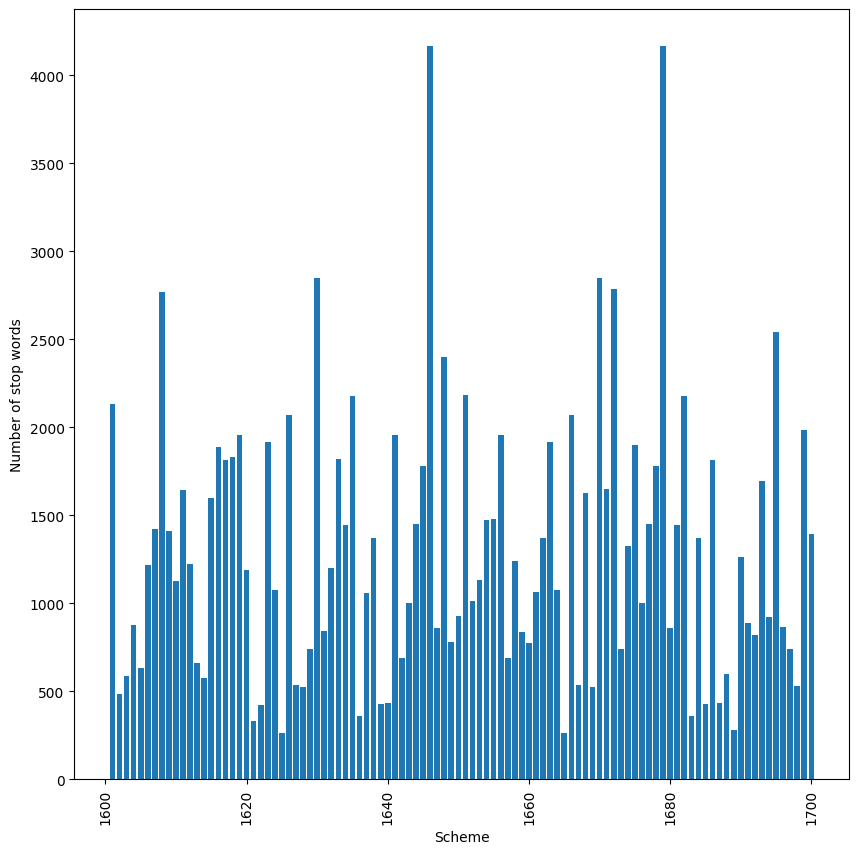

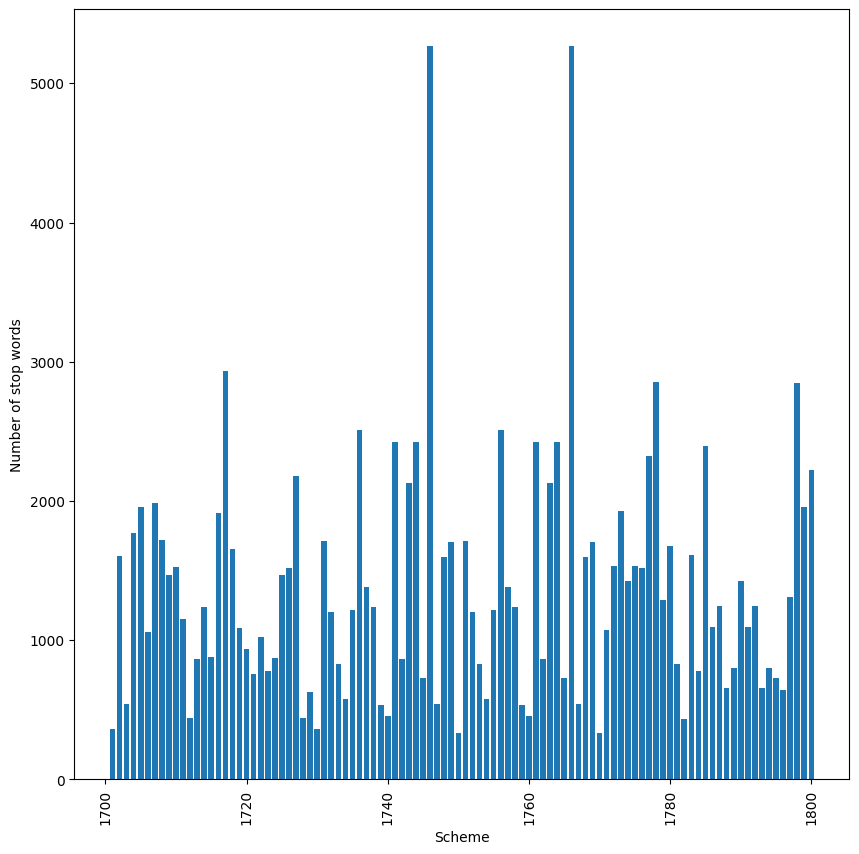

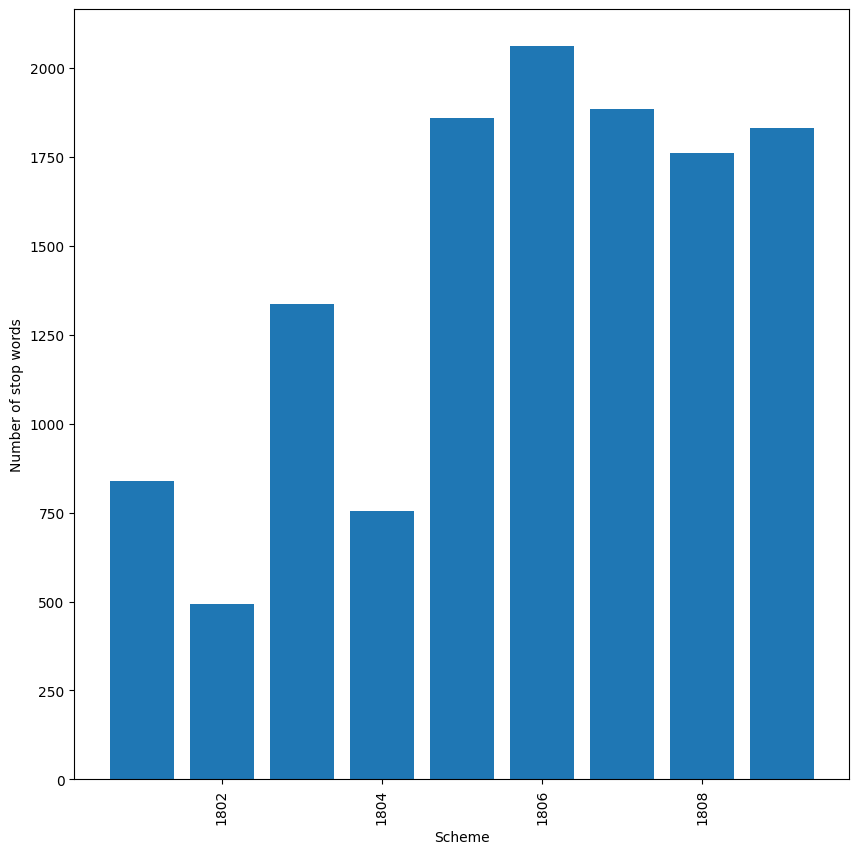

In [25]:
for i in range(0,len(policies),100):
    start = i
    stop = i+100
    if(stop>len(policies)):
        stop=len(policies)-1
    sliced_keys = dict(itertools.islice(policies.items(), start, stop))
    plt.figure(figsize=(10, 10))
    plt.bar(sliced_keys.keys(),sliced_keys.values())
    plt.xlabel("Scheme")
    plt.xticks(rotation=90)
    plt.ylabel("Number of stop words")
    plt.show()